# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)

        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros((n_features, 1))
        self.bias = 0.0

        # Gradient Descent
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias


In [ ]:
# Sample training data
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([3, 5, 7, 9, 11])
model = LinearRegression(learning_rate=0.01, epochs=2000)
model.fit(X_train, y_train)
model = LinearRegression(learning_rate=0.01, epochs=2000)
model.fit(X_train, y_train)
X_test = np.array([[6], [7], [8]])
predictions = model.predict(X_test)

print(predictions)


[[13.00929999]
 [15.01319171]
 [17.01708344]]


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [ ]:
import pandas as pd
df = pd.read_csv("real estate.csv")


In [ ]:
import pandas as pd
df = pd.read_csv("real estate.csv")
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.isnull().sum()


,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


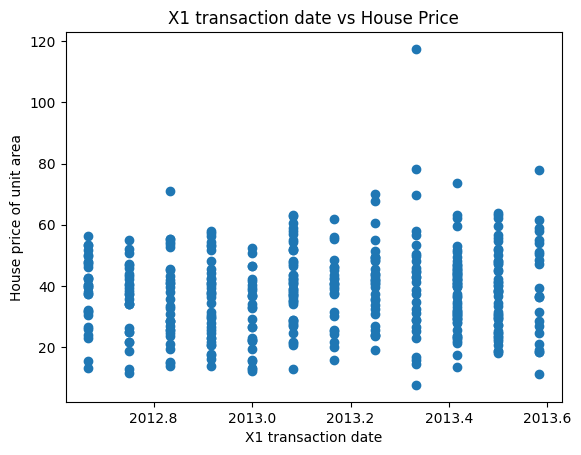

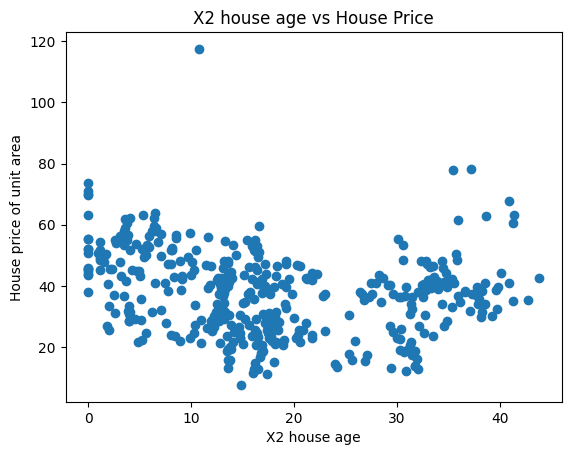

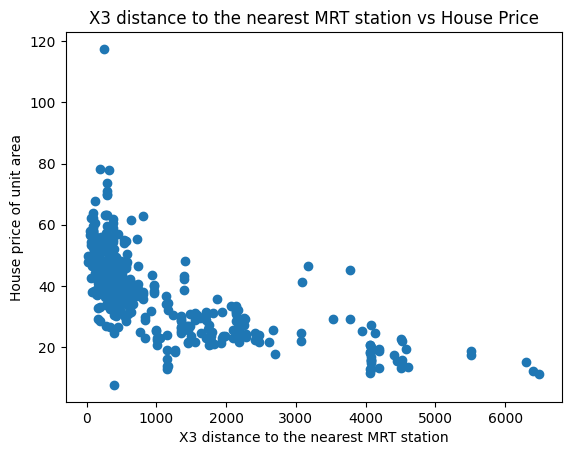

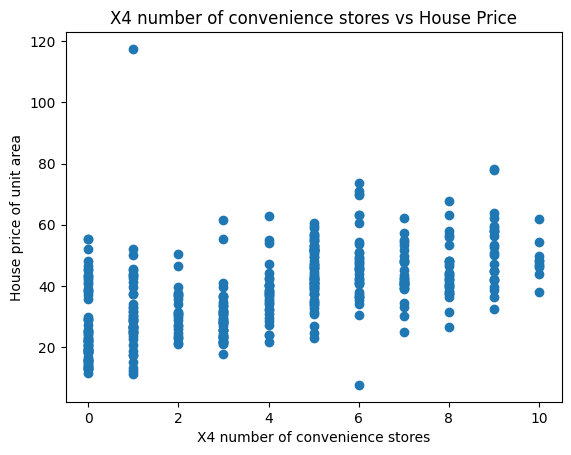

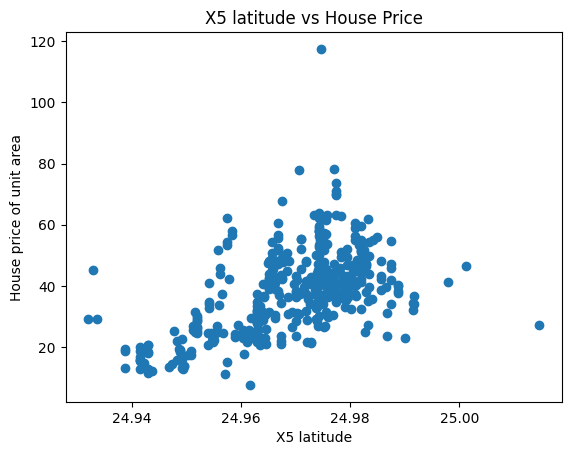

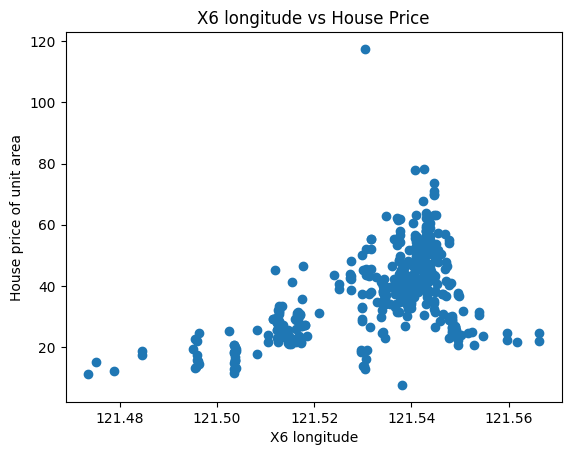

In [ ]:
import matplotlib.pyplot as plt

y = df["Y house price of unit area"]

for col in df.columns[1:-1]:
    plt.figure()
    plt.scatter(df[col], y)
    plt.xlabel(col)
    plt.ylabel("House price of unit area")
    plt.title(f"{col} vs House Price")
    plt.show()


In [ ]:
df = df.drop(columns=["No"])
df.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Y house price of unit area"])
y = df["Y house price of unit area"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 66.6733627183596
R² Score: 0.579662418286177


In [ ]:
from sklearn.linear_model import Ridge, Lasso

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01)
}

for name, m in models.items():
    m.fit(X_train_scaled, y_train)
    pred = m.predict(X_test_scaled)

    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    print(name)
    print("MSE:", mse)
    print("R²:", r2)
    print("-" * 30)


Linear Regression
MSE: 66.6733627183596
R²: 0.579662418286177
------------------------------
Ridge Regression
MSE: 65.41303409820154
R²: 0.5876080724839378
------------------------------
Lasso Regression
MSE: 66.24593651248999
R²: 0.582357097096593
------------------------------


In [ ]:
# Custom Gradient Descent Linear Regression
gd_model = GDLinearRegression(learning_rate=0.01, epochs=8000)
gd_model.fit(X_train_scaled, y_train)

gd_preds = gd_model.predict(X_test_scaled)

print("Custom GD Model")
print("MSE:", mean_squared_error(y_test, gd_preds))
print("R²:", r2_score(y_test, gd_preds))


Custom GD Model
MSE: 65.2266984978963
R²: 0.5887828123264496


In [ ]:
!rm -f kaggle.json


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [ ]:

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()


In [ ]:
X = data.data        # shape (n_samples, 30)
y = data.target      # 0 = malignant, 1 = benign


In [ ]:
X.shape, y.shape


((569, 30), (569,))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


5. Write code for the sigmoid function and Logistic regression.


In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)


In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        # Initialize hyperparameters
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)

        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred >= 0.5).astype(int)


6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [ ]:
custom_model = LogisticRegression(learning_rate=0.01, epochs=5000)
custom_model.fit(X_train, y_train)

y_pred_custom = custom_model.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression as SkLogisticRegression

penalties = ['l2', None]
sklearn_results = {}

for p in penalties:
    model = SkLogisticRegression(
        penalty=p,
        solver='lbfgs',
        max_iter=5000
    )
    model.fit(X_train, y_train)
    sklearn_results[p] = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

print("Custom Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_custom))

for p, preds in sklearn_results.items():
    print(f"Sklearn Logistic Regression ({p}) Accuracy:",
          accuracy_score(y_test, preds))


Custom Logistic Regression Accuracy: 0.9824561403508771
Sklearn Logistic Regression (l2) Accuracy: 0.9736842105263158
Sklearn Logistic Regression (None) Accuracy: 0.9385964912280702


In [ ]:
from sklearn.metrics import classification_report

print("Custom Logistic Regression Report")
print(classification_report(y_test, y_pred_custom))

best_penalty = max(sklearn_results,
                   key=lambda p: accuracy_score(y_test, sklearn_results[p]))

print(f"Sklearn Logistic Regression ({best_penalty}) Report")
print(classification_report(y_test, sklearn_results[best_penalty]))


Custom Logistic Regression Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Sklearn Logistic Regression (l2) Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.metrics import confusion_matrix

print("Custom Logistic Regression Confusion Matrix")
print(confusion_matrix(y_test, y_pred_custom))

print(f"Sklearn Logistic Regression ({best_penalty}) Confusion Matrix")
print(confusion_matrix(y_test, sklearn_results[best_penalty]))


Custom Logistic Regression Confusion Matrix
[[42  1]
 [ 1 70]]
Sklearn Logistic Regression (l2) Confusion Matrix
[[41  2]
 [ 1 70]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [ ]:
import pandas as pd
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
X = df.drop(columns=["Type"])
y = df["Type"]
y = y - 1


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [ ]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [
                euclidean_distance(x, x_train)
                for x_train in self.X_train
            ]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            predictions.append(np.bincount(k_labels).argmax())
        return np.array(predictions)


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [ ]:
from sklearn.metrics import accuracy_score

for k in [3, 5, 7]:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k}, Accuracy = {acc:.4f}")


k = 3, Accuracy = 0.7222
k = 5, Accuracy = 0.6296
k = 7, Accuracy = 0.6852


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

sk_knn = KNeighborsClassifier(n_neighbors=3)
sk_knn.fit(X_train, y_train)

sk_pred = sk_knn.predict(X_test)

print("Sklearn KNN Accuracy:", accuracy_score(y_test, sk_pred))


Sklearn KNN Accuracy: 0.7222222222222222
